In [22]:
import xarray as xr

# Load the NetCDF file to inspect the contents
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

# Display the data variables and dimensions
data_info = data
data_info


<xarray.Dataset>
Dimensions:             (diameter: 55, time: 1081, flag: 83)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * time                (time) datetime64[ns] 2024-05-16 ... 2024-06-30
  * flag                (flag) <U74 '+ postfilter voltage may be too high' .....
Data variables:
    neg_ions            (time, diameter) float64 ...
    pos_ions            (time, diameter) float64 ...
    neg_particles       (time, diameter) float64 ...
    pos_particles       (time, diameter) float64 ...
    neg_ion_flags       (time, flag) int64 ...
    pos_ion_flags       (time, flag) int64 ...
    neg_particle_flags  (time, flag) int64 ...
    pos_particle_flags  (time, flag) int64 ...
Attributes: (12/14)
    measurement_location:            ISAC
    description:                     Rooftop Industrial Area
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    1.0
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

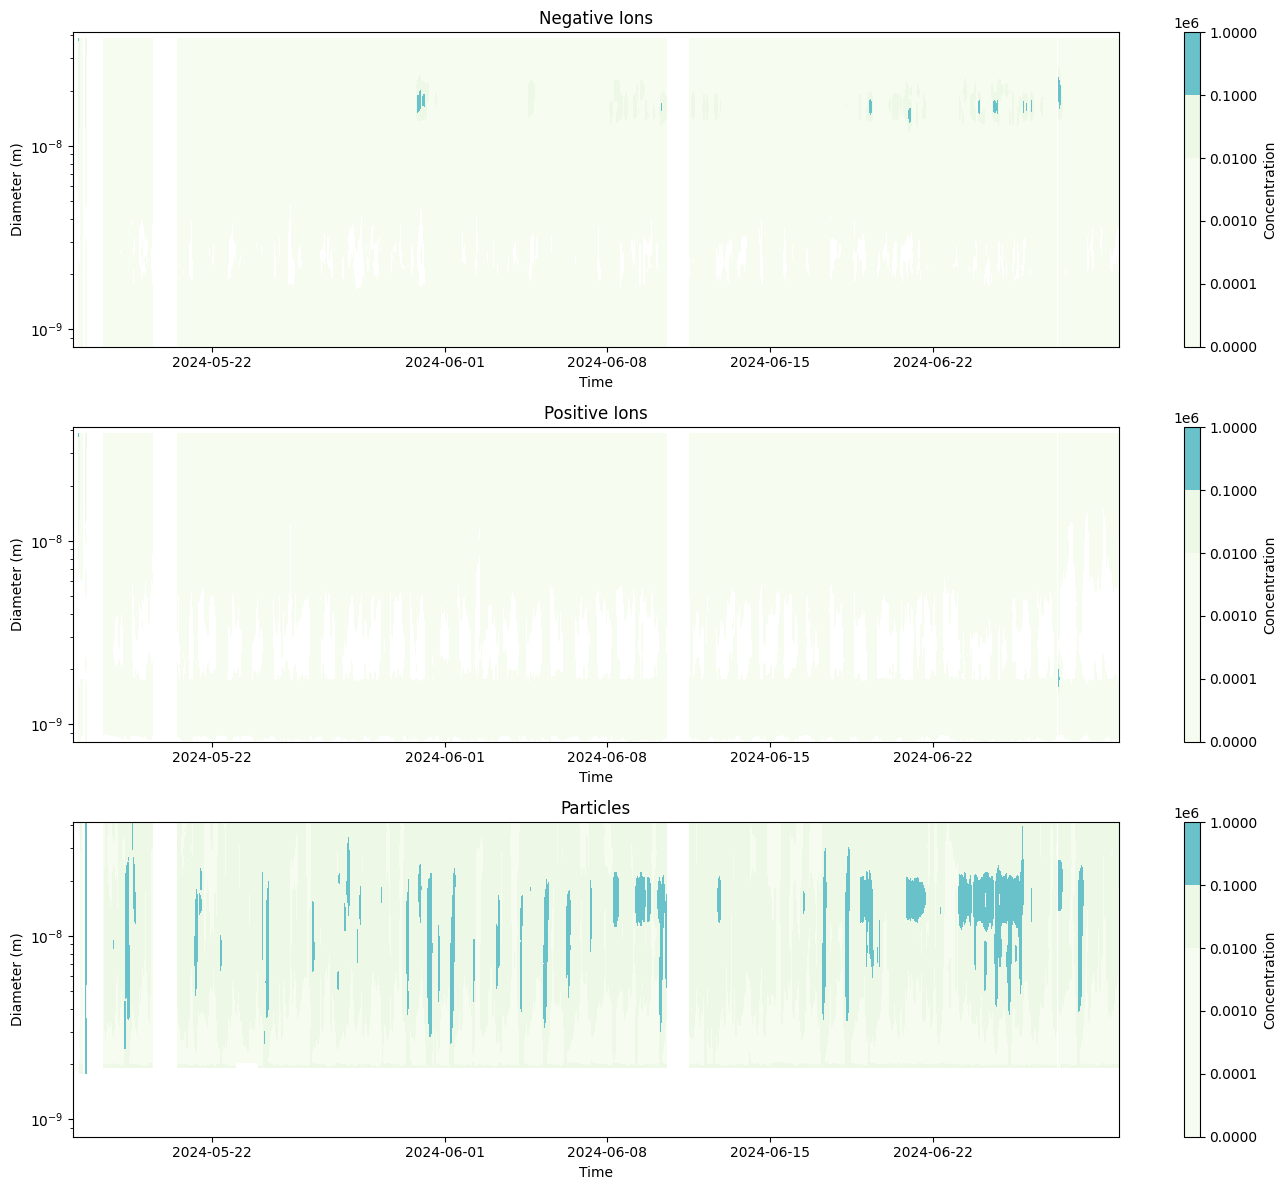

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T, levels=[1e1,1e2,1e3,1e4,1e5,1e6], cmap='GnBu')
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


/tmp/ipykernel_16583/4287944405.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1,1e1,1e2,1e3,1e4,1e5,1e6], locator=ticker.LogLocator(), cmap=cm.PuBu_r)


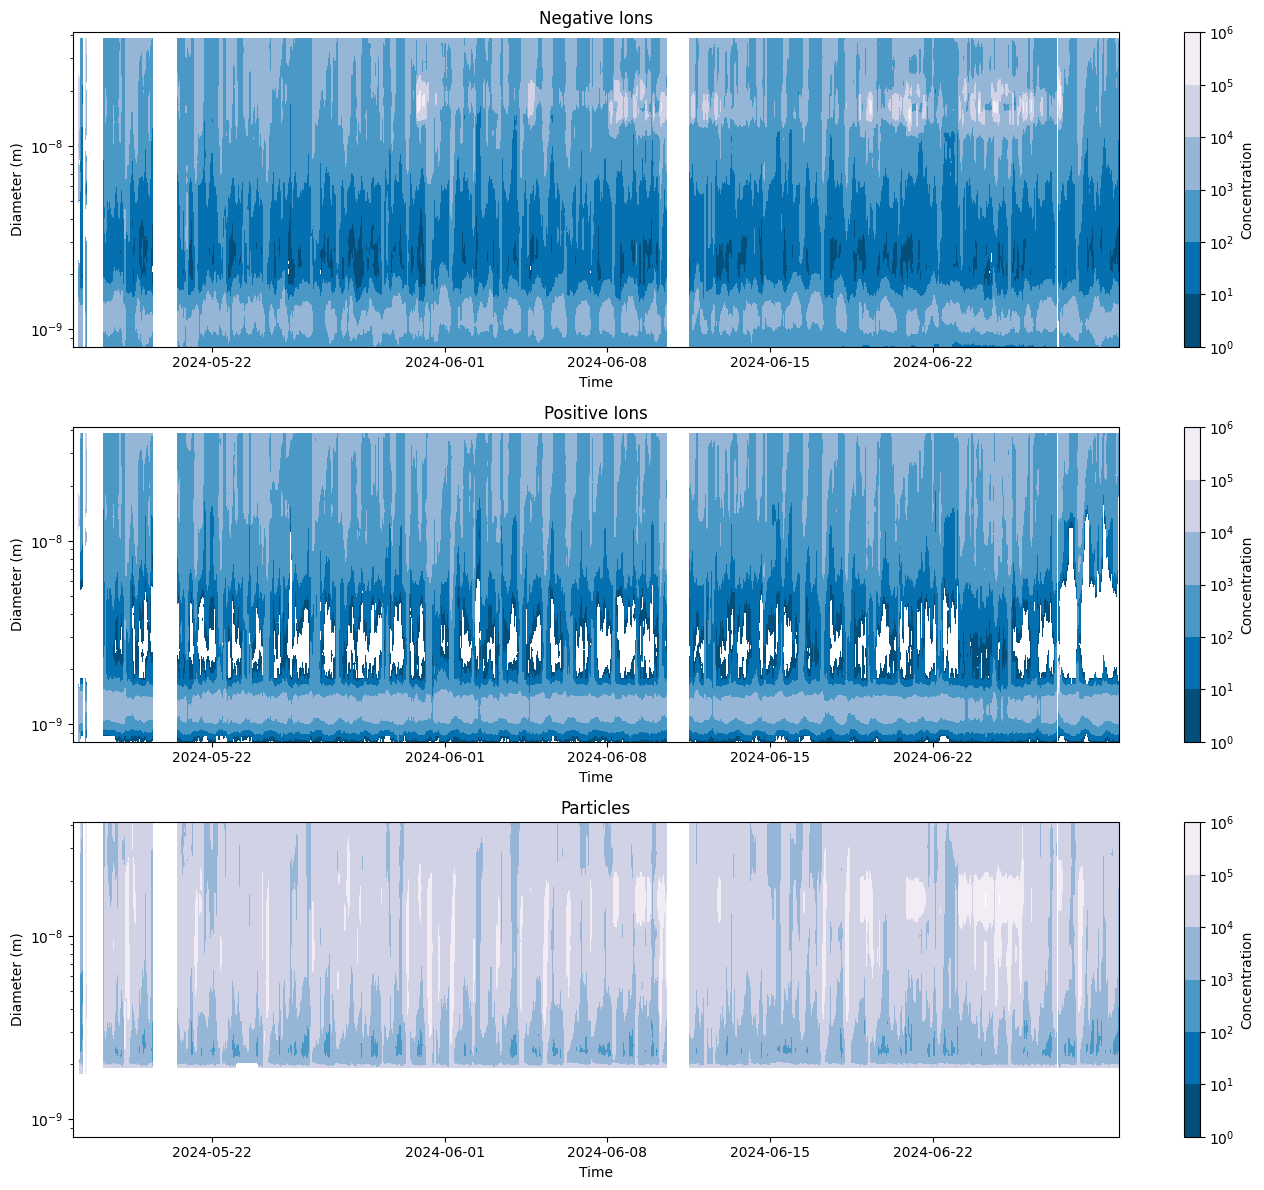

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1,1e1,1e2,1e3,1e4,1e5,1e6], locator=ticker.LogLocator(), cmap=cm.PuBu_r)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


/tmp/ipykernel_16583/2389184214.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1e1,1e2,1e3,1e4,1e5,1e6], locator=ticker.LogLocator(), cmap=cm.YlGnBu)


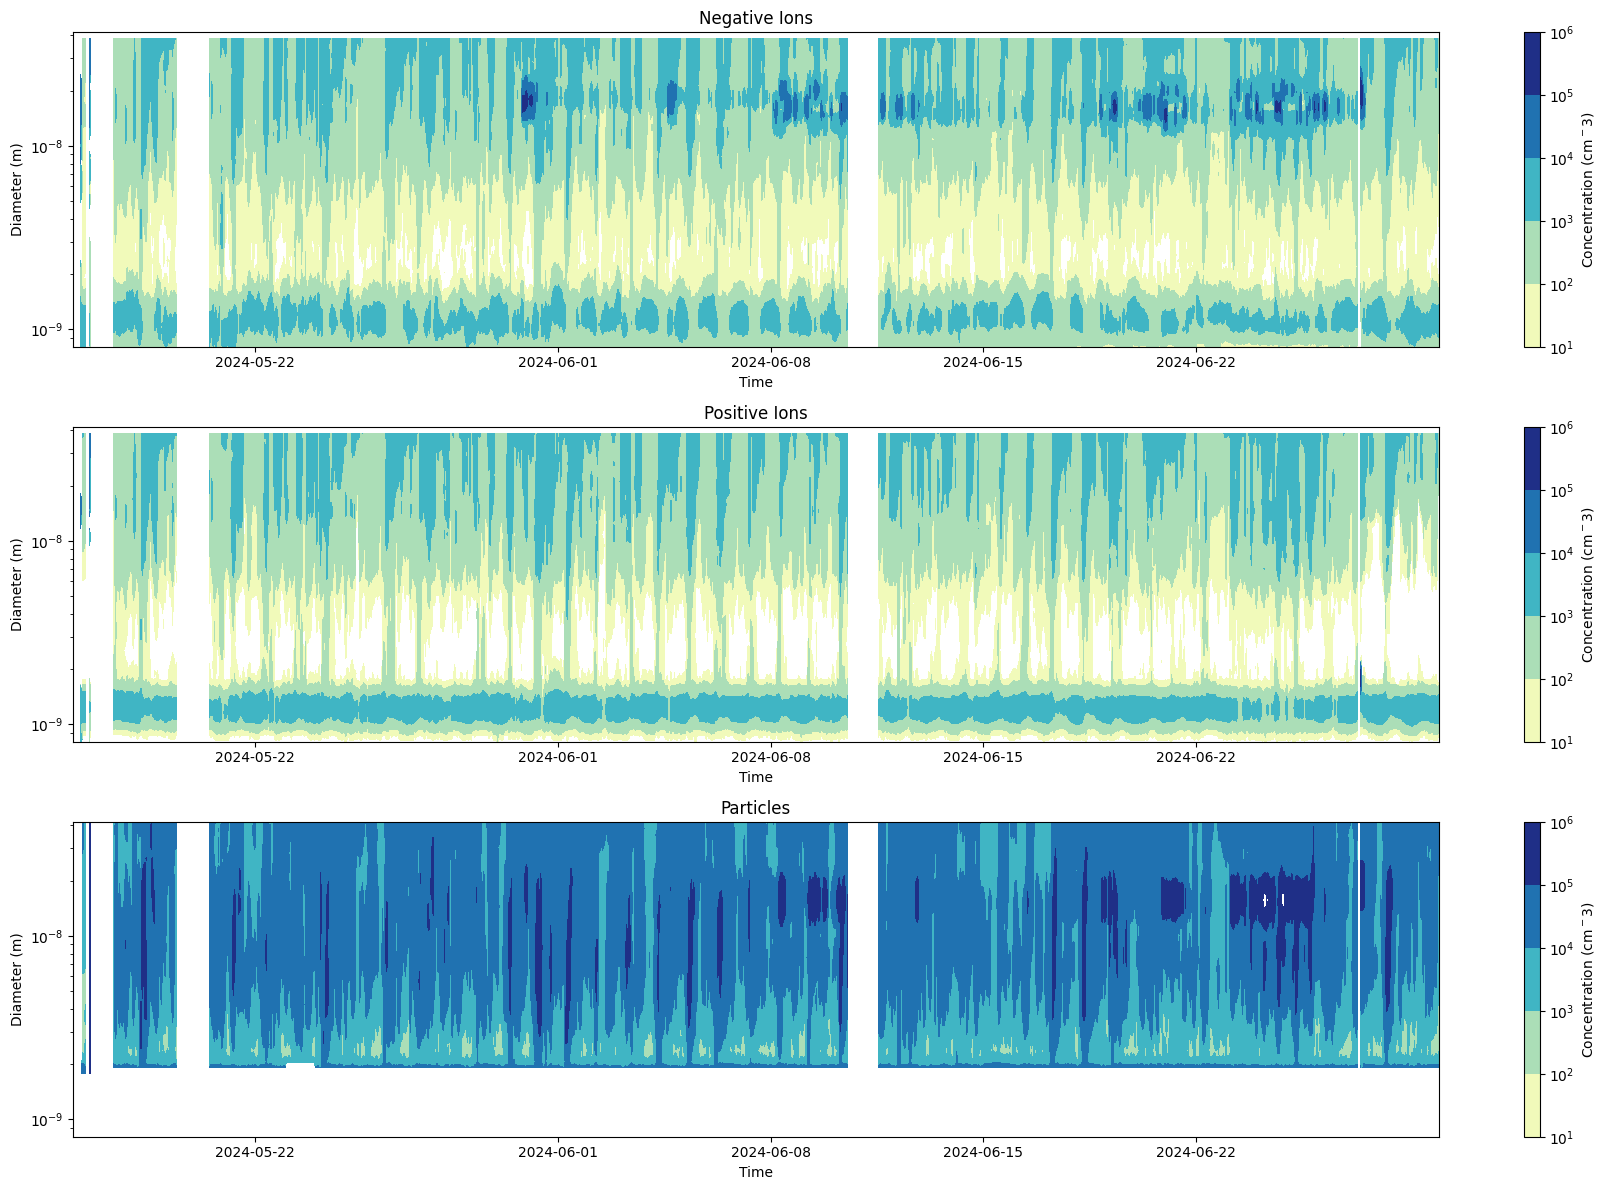

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1e1,1e2,1e3,1e4,1e5,1e6], locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


/tmp/ipykernel_16583/3811862842.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.linspace(10,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_16583/3811862842.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.linspace(10,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_16583/3811862842.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.linspace(10,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)


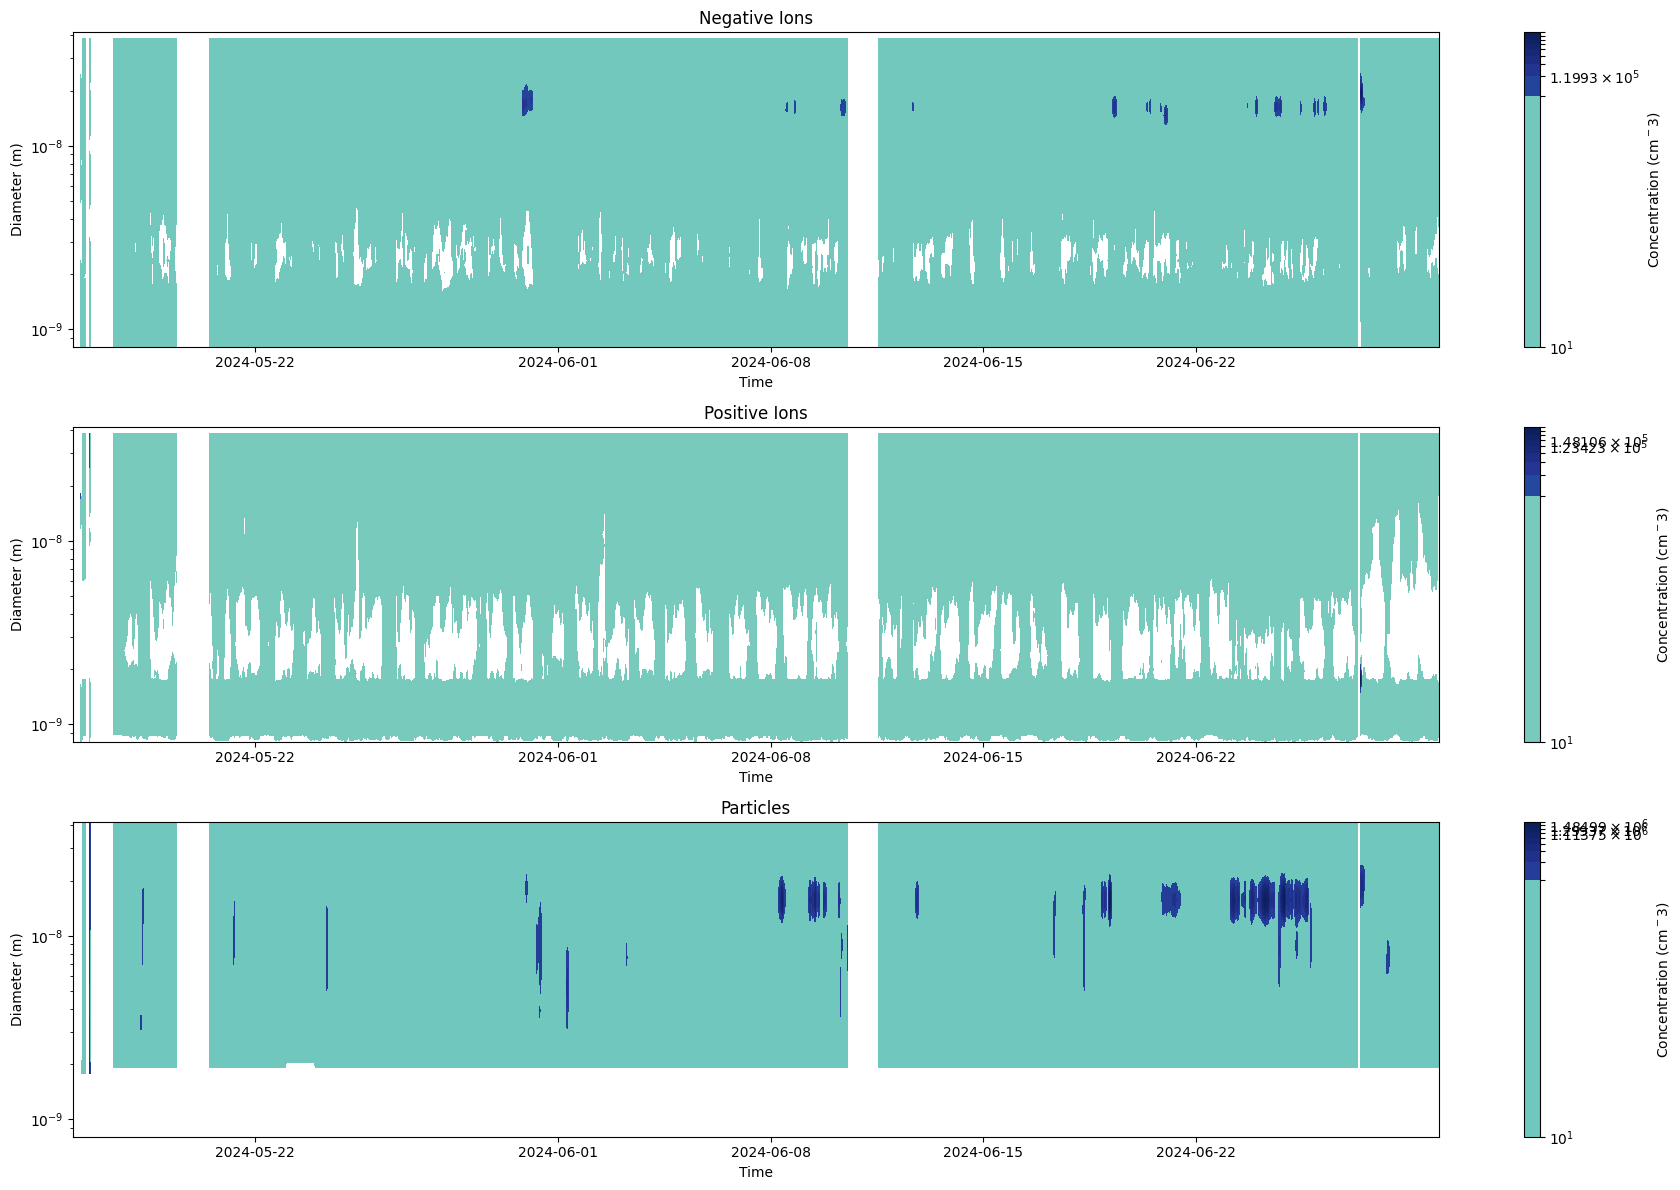

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.linspace(10,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


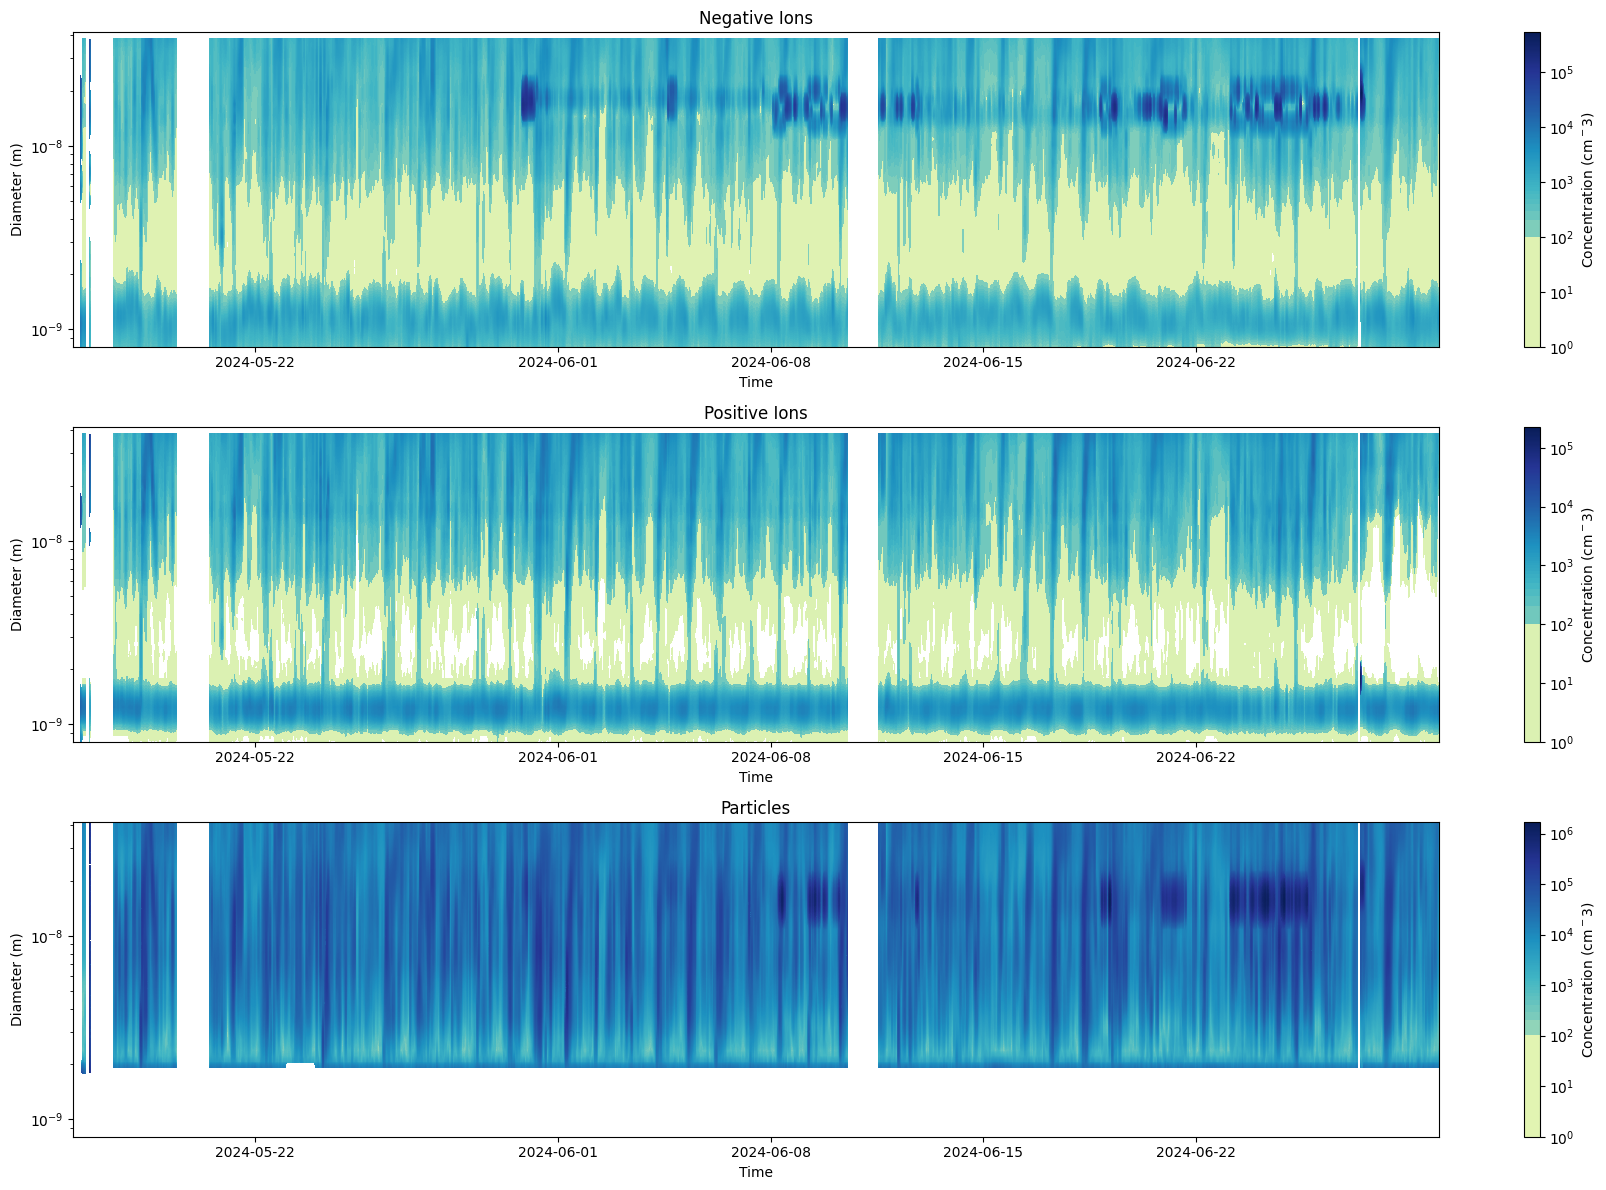

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from numpy import ma

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


/tmp/ipykernel_16583/249252256.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_16583/249252256.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_16583/249252256.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)


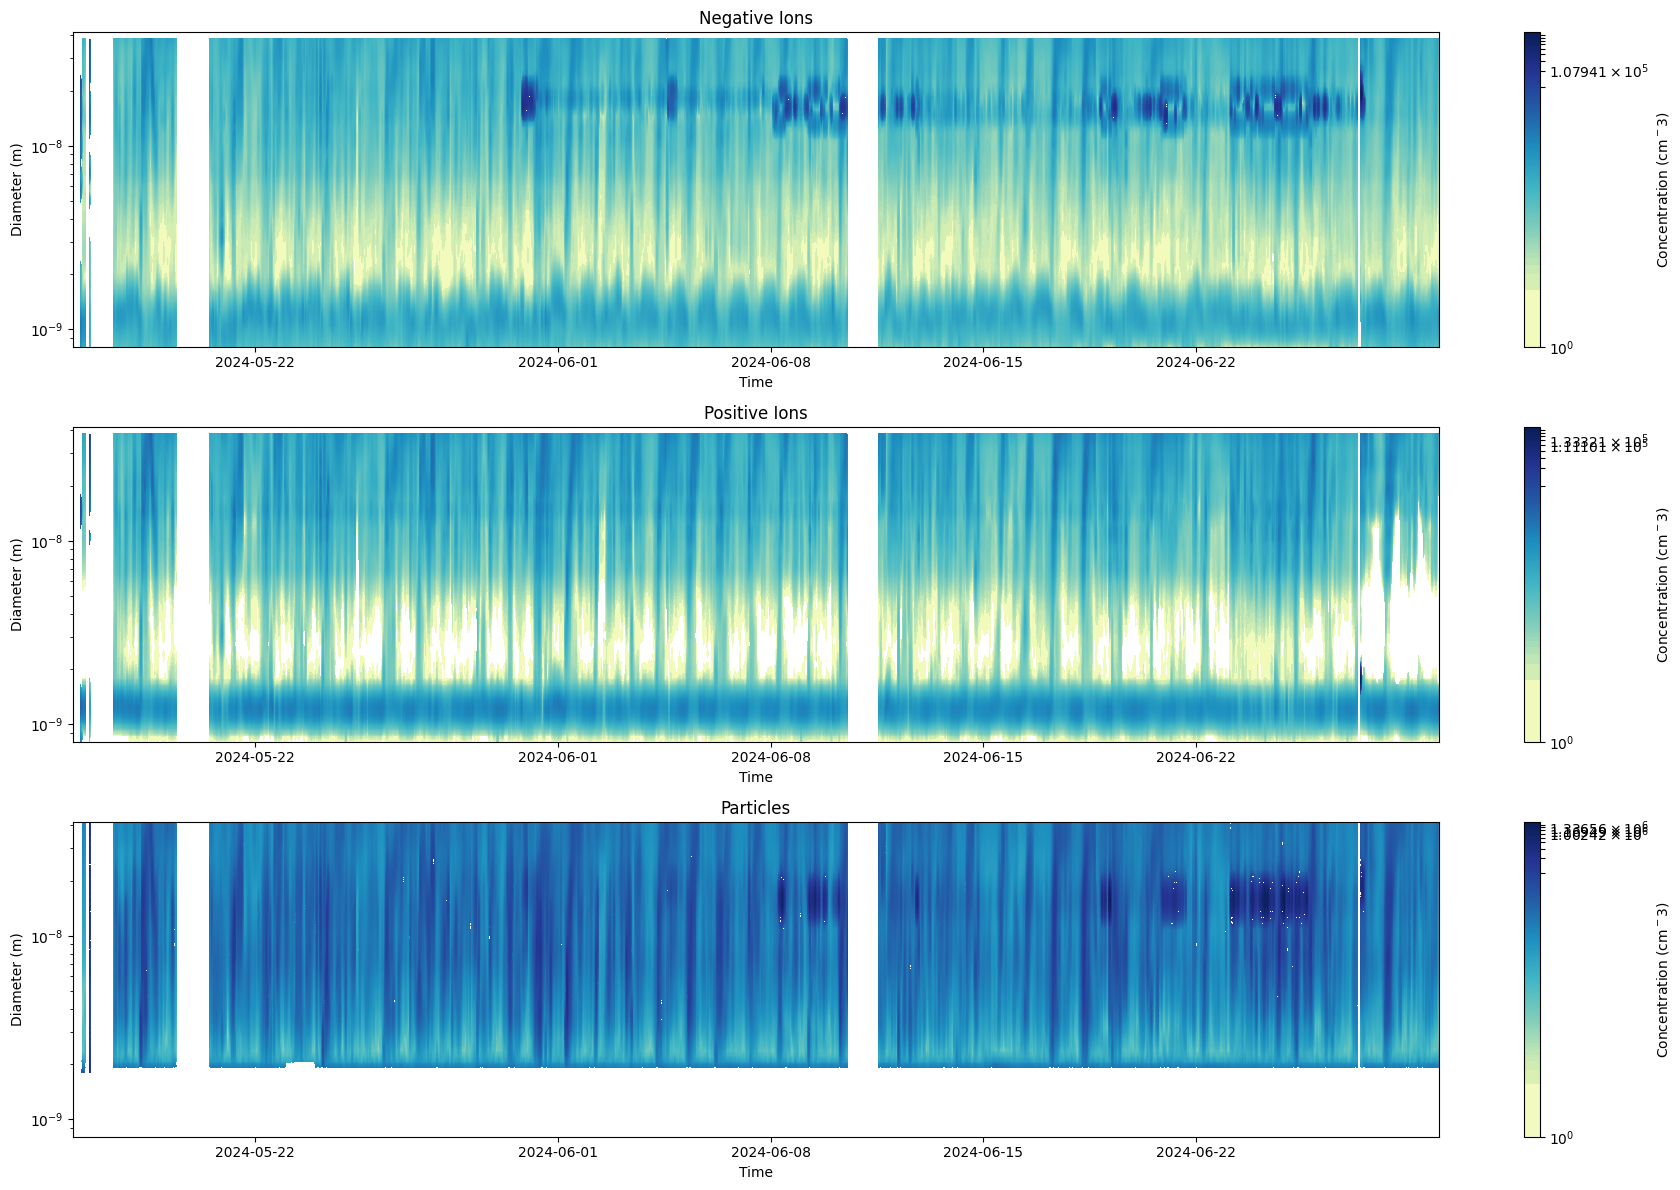

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),10),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


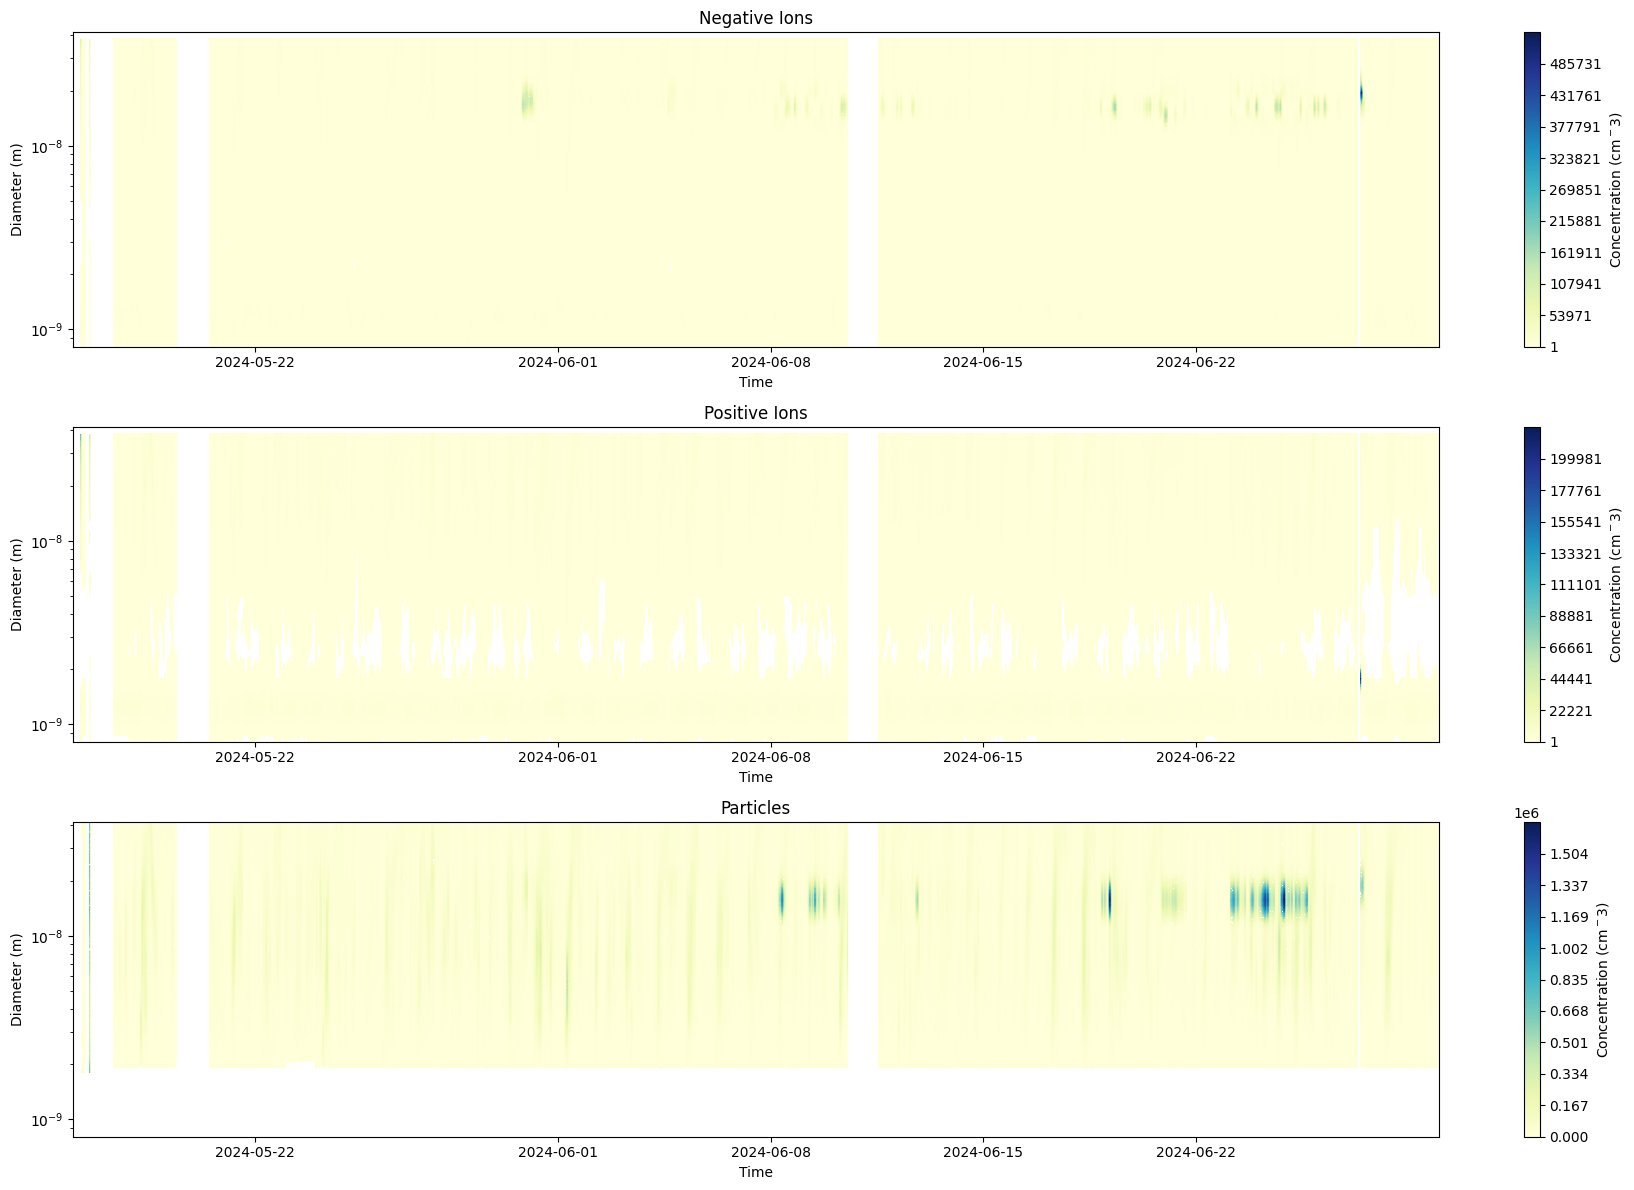

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),10), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


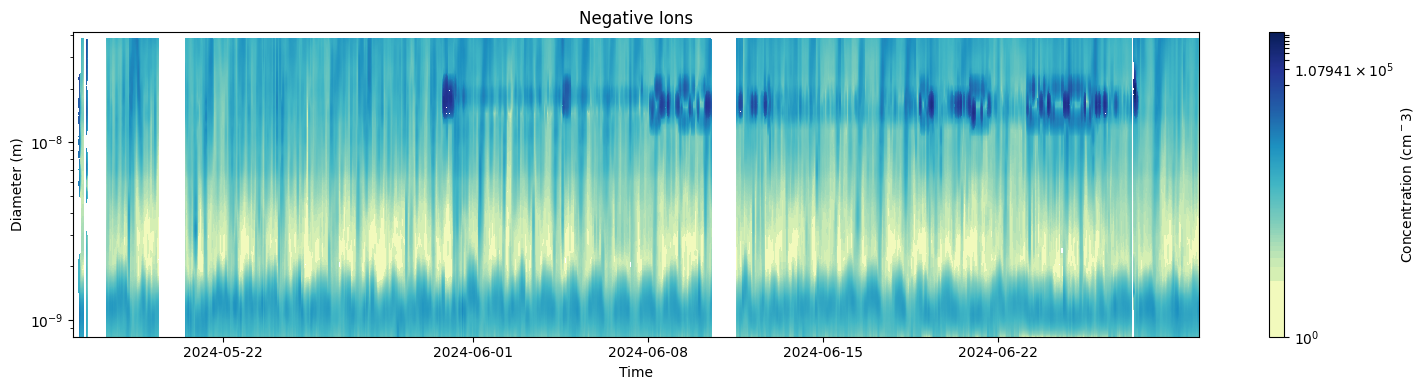

In [105]:
from numpy import ma
#masked_neg = np.ma.masked_less(neg_ions, 0) #has a warning message
masked_neg = ma.masked_where(neg_ions <= 0, neg_ions)

plt.figure(figsize=(15,4))
plt.contourf(neg_ions['time'], neg_ions['diameter'], masked_neg.T,levels=np.arange(1,539650,10), locator=ticker.LogLocator(), cmap=cm.YlGnBu)
plt.colorbar(label="Concentration (cm$^-3$)")
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Diameter (m)')
plt.title('Negative Ions')

plt.tight_layout()
plt.show()

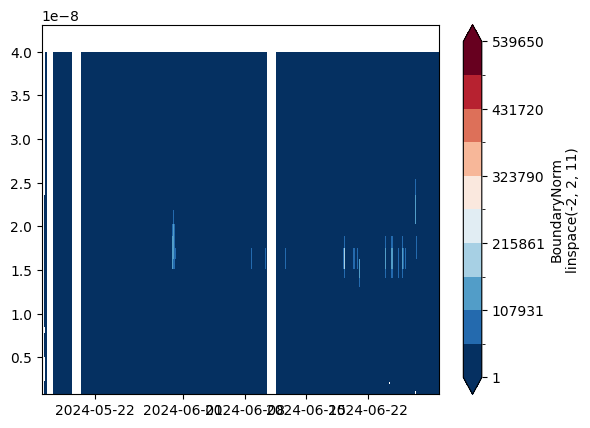

In [108]:
import matplotlib.colors as colors
# Evenly-spaced bounds gives a contour-like effect.
bounds = np.linspace(1,539650, 11)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = plt.pcolormesh(neg_ions['time'], neg_ions['diameter'], masked_neg.T, cmap='RdBu_r', shading='nearest',norm=norm)
plt.colorbar(pcm, extend='both', orientation='vertical',
             label='BoundaryNorm\nlinspace(-2, 2, 11)')


In [103]:
len(np.arange(1,neg_ions.max().item(),10000))
#len(np.arange(neg_ions.max().item()))

54

In [77]:
# Calculate the maximum and minimum values for each variable
neg_ions_min, neg_ions_max = neg_ions.min().item(), neg_ions.max().item()
pos_ions_min, pos_ions_max = pos_ions.min().item(), pos_ions.max().item()
particles_min, particles_max = particles.min().item(), particles.max().item()

neg_ions_min, neg_ions_max, pos_ions_min, pos_ions_max, particles_min, particles_max


(-40.95891432761306,
 539650.4753411573,
 -497.8081235157055,
 222154.12442132342,
 -20328.95701091885,
 1670616.1283158457)

In [78]:
np.linspace(1,539650,100)

array([1.00000e+00, 5.45200e+03, 1.09030e+04, 1.63540e+04, 2.18050e+04,
       2.72560e+04, 3.27070e+04, 3.81580e+04, 4.36090e+04, 4.90600e+04,
       5.45110e+04, 5.99620e+04, 6.54130e+04, 7.08640e+04, 7.63150e+04,
       8.17660e+04, 8.72170e+04, 9.26680e+04, 9.81190e+04, 1.03570e+05,
       1.09021e+05, 1.14472e+05, 1.19923e+05, 1.25374e+05, 1.30825e+05,
       1.36276e+05, 1.41727e+05, 1.47178e+05, 1.52629e+05, 1.58080e+05,
       1.63531e+05, 1.68982e+05, 1.74433e+05, 1.79884e+05, 1.85335e+05,
       1.90786e+05, 1.96237e+05, 2.01688e+05, 2.07139e+05, 2.12590e+05,
       2.18041e+05, 2.23492e+05, 2.28943e+05, 2.34394e+05, 2.39845e+05,
       2.45296e+05, 2.50747e+05, 2.56198e+05, 2.61649e+05, 2.67100e+05,
       2.72551e+05, 2.78002e+05, 2.83453e+05, 2.88904e+05, 2.94355e+05,
       2.99806e+05, 3.05257e+05, 3.10708e+05, 3.16159e+05, 3.21610e+05,
       3.27061e+05, 3.32512e+05, 3.37963e+05, 3.43414e+05, 3.48865e+05,
       3.54316e+05, 3.59767e+05, 3.65218e+05, 3.70669e+05, 3.761

In [76]:
masked_neg

masked_array(
  data=[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [319.16842127838095, 576.2531815064028, 811.8370681258824, ...,
         1115.1320296231738, 1399.9414434054154, nan],
        [417.3030532821002, 684.9180970367765, 998.6452254287456, ...,
         1450.2822905799394, 1462.1898871149979, nan],
        [428.3860733327148, 740.3608659394238, 1139.6123974982943, ...,
         336.9598205161544, 497.59167878500074, nan]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20)

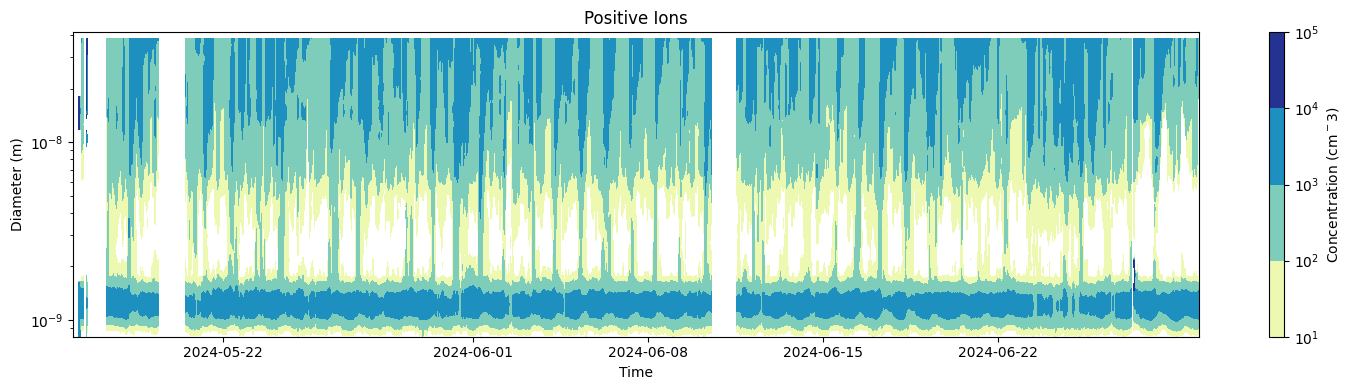

In [59]:
from numpy import ma
#masked_pos = np.ma.masked_less(pos_ions, 0)
masked_pos = ma.masked_where(pos_ions <= 0, pos_ions)

plt.figure(figsize=(15,4))
plt.contourf(pos_ions['time'], pos_ions['diameter'], masked_pos.T,levels=[1e1,1e2,1e3,1e4,1e5], locator=ticker.LogLocator(), cmap=cm.YlGnBu)
plt.colorbar(label="Concentration (cm$^-3$)")
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Diameter (m)')
plt.title('Positive Ions')

plt.tight_layout()
plt.show()

/tmp/ipykernel_16583/1040229739.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1e1,1e2,1e3,1e4,1e5], locator=ticker.LogLocator(), cmap=cm.cool)


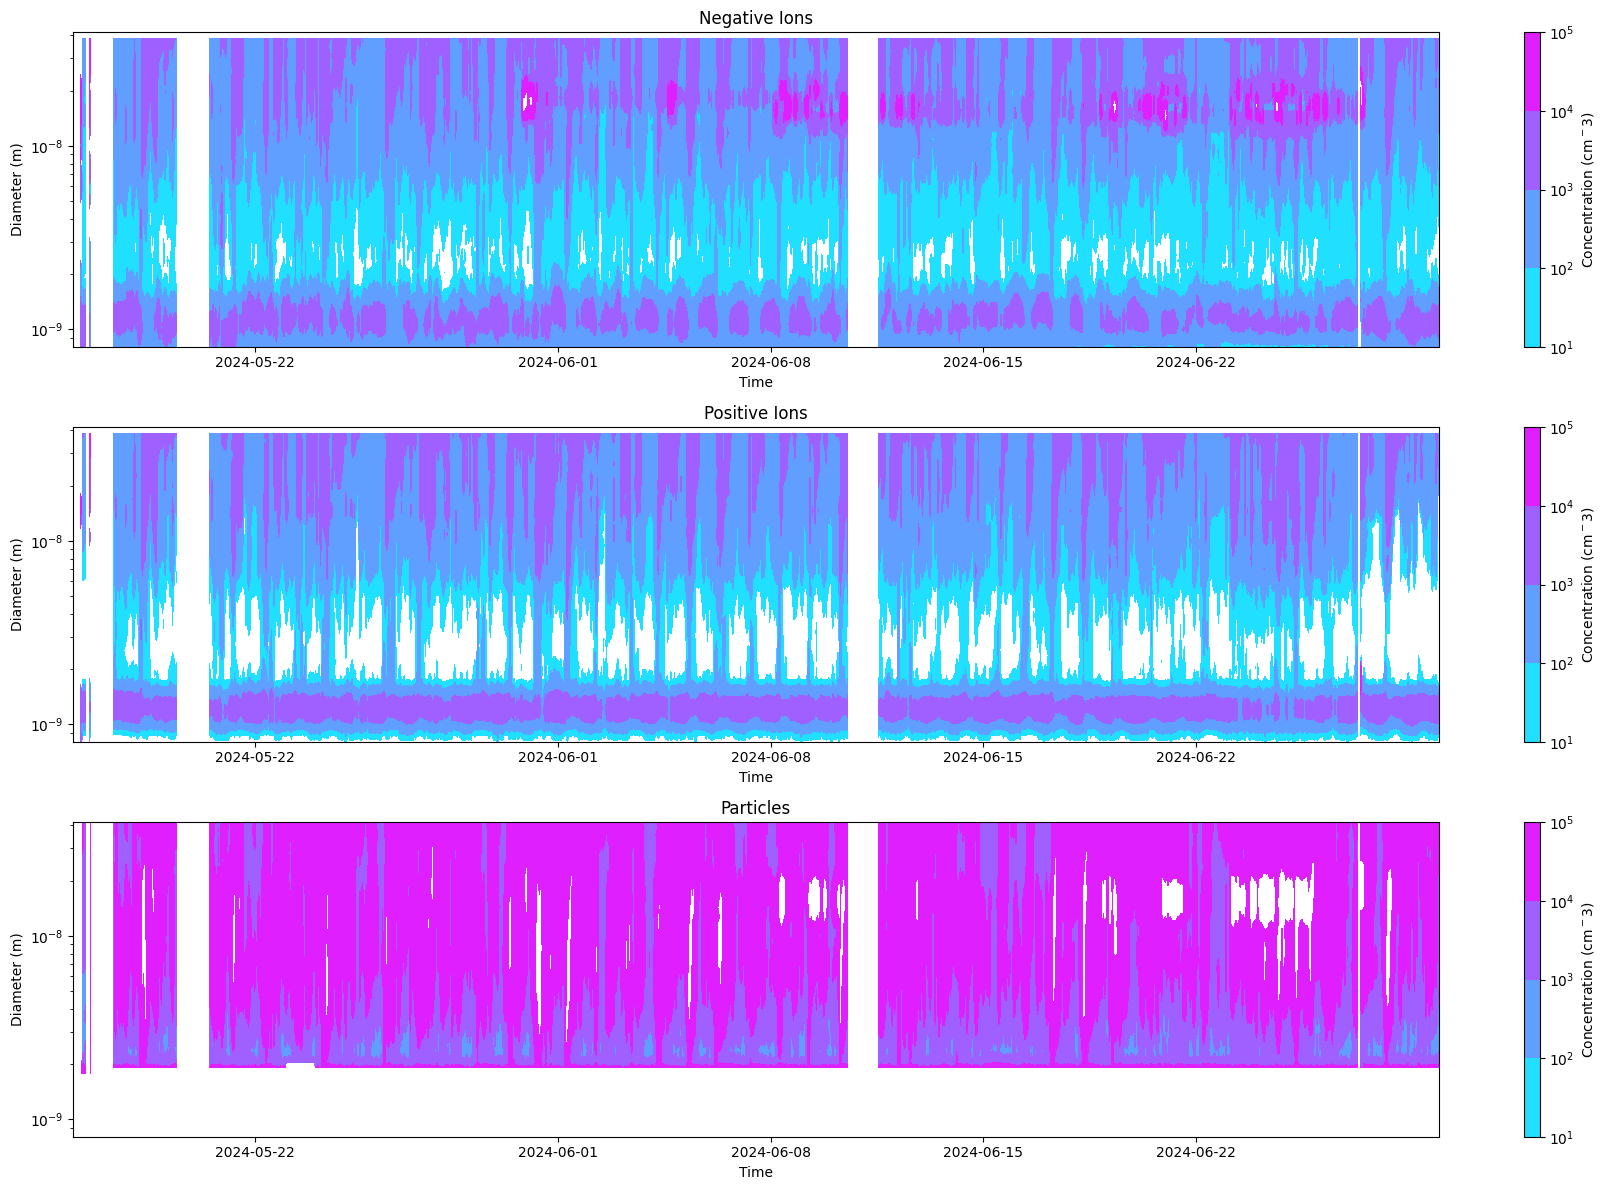

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Extract the necessary variables
neg_ions = data['neg_ions']
pos_ions = data['pos_ions']

# Calculate particles (positive + negative particles)
particles = data['pos_particles'] + data['neg_particles']

# Function to plot the data with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = np.ma.masked_less(var, 0)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=[1e1,1e2,1e3,1e4,1e5], locator=ticker.LogLocator(), cmap=cm.cool)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()


In [ ]:
neg_ions

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

#To convert the diameter values to nm
#dataset = data.assign_coords(diameter=data['diameter'] * 1e9)

/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/coliewo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
data.pos_ions.values.min()

nan

In [2]:
neg_ions = data.neg_ions
pos_ions = data.pos_ions
particles = data.pos_particles + data.neg_particles

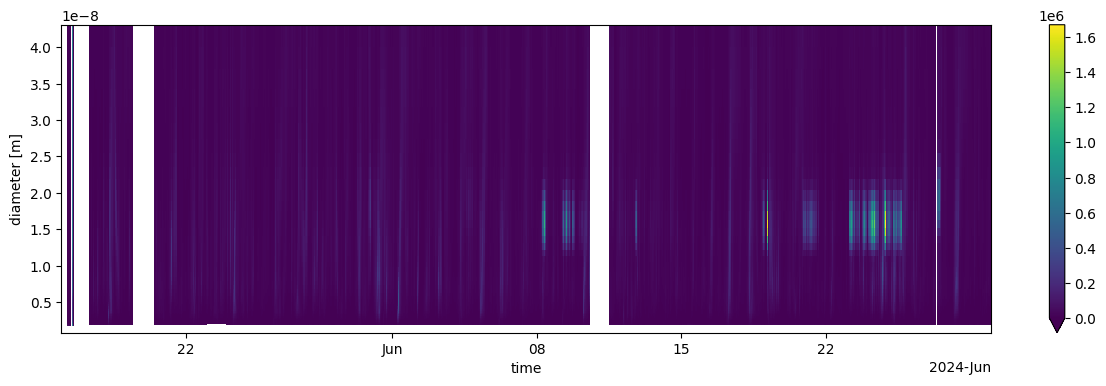

In [19]:
plt.figure(figsize=(15,4))
particles.T.plot(vmin=0)

[]

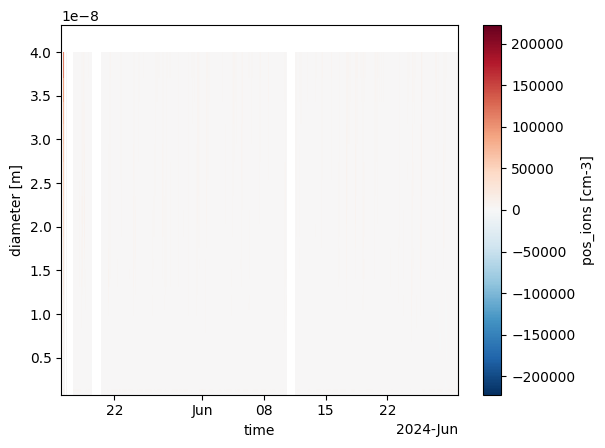

In [47]:
pos_ions.T.plot()
plt.plot(locator=ticker.LogLocator())

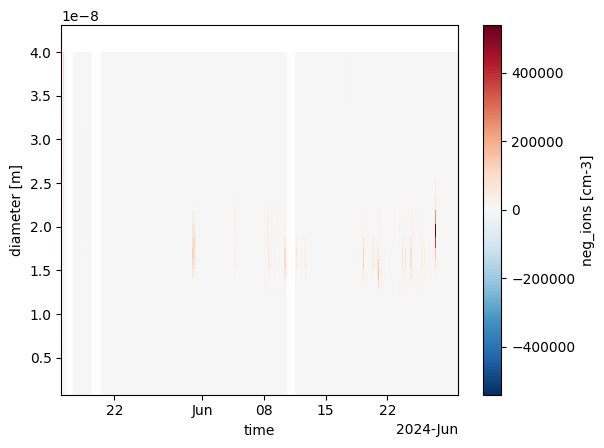

In [45]:
neg_ions.T.plot()

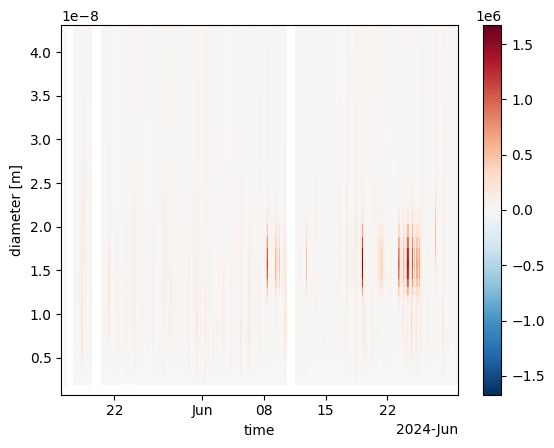

In [48]:
particles.T.plot()